------ Chapter 12 of MLAPP: Generalized Linear Models ------

@author Zijie ZHONG / Zigit CHUNG

@date 5 nov 2021

In this demo I will try to re-obtain some distributions by modifying the parameters in the general formula for the Exponential Family Models. 

List : Bernoulli, Binomial, Poisson, Exponential, Normal 

[Reference](https://en.wikipedia.org/wiki/Exponential_family)

Bernoulli

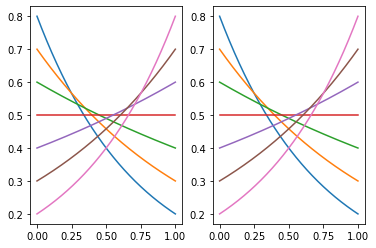

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Definition of the formula
x = np.arange(0,1.001,0.001)
h = 1
T = x
def eta(theta):
    return np.log(theta/(1-theta))
def A(eta):
    return np.log(1+np.exp(eta))

# plot the pdf generated 2 ways 
fig, ax = plt.subplots(1, 2)
for p in (0.2,0.3,0.4,0.5,0.6,0.7,0.8):
    # FEF
    pdf = h * np.exp(np.dot(eta(p),x)-A(eta(p)))
    ax[0].plot(x,pdf)
    ## original form
    pdf2 = p**x*(1-p)**(1-x)
    ax[1].plot(x,pdf2)
plt.show()

Binomial with time of trials (n) = 50 

0.0
9.094947017729282e-13
0


TypeError: 'numpy.float64' object does not support item assignment

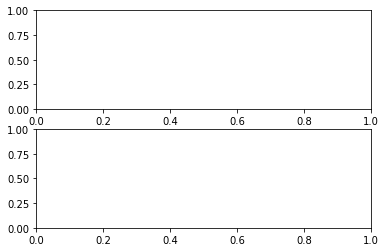

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

# Definition of the formula
x_set = np.arange(0,51,1)
n = 40
def h(n,x):
    return m.comb(n,x)
def T(x):
    return x
def eta(theta):
    return np.log(theta/(1-theta))
def A(eta):
    return n*np.log(1+np.exp(eta))

p = 0.5
pdf = np.zeros(50)
pdf2 = np.zeros(50)
# plot the pdf generated 2 ways 
fig, ax = plt.subplots(2, 1)
for p in (0.1,0.2,0.3,0.4):
    for x in x_set:
        # FEF
        pdf[x] = np.dot(h(n,x),   np.exp(  np.dot(eta(p),x)  -  A(eta(p))   )   )
        ## original form
        pdf2[x] = m.comb(n,x)*(p**x)*(1-p)**(n-x)
    ax[0].plot(x,pdf,'o')
    ax[1].plot(x,pdf2,'o')
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt

pdf = np.zeros(5)
pdf[0] = 0
pdf[1] = 1
pdf[2] = 2